In [72]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import cv2
import matplotlib.pyplot as plt

MARGIN = 10
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54)
IMAGE_DIR = "images/woman_hands.jpg"

In [84]:
def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  x_min, x_max, y_min, y_max = 0, 0, 0, 0
  annotated_image = 0
  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    x_min = int(min(x_coordinates) * width)
    x_max = int(max(x_coordinates) * width)
    y_min = int(min(y_coordinates) * height)
    y_max = int(max(y_coordinates) * height)

    cv2.rectangle(annotated_image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)  # Draw a blue bounding box

    text_x = x_min
    text_y = y_min - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return {"annoted_image": annotated_image, "coordinates": [x_min, x_max, y_min, y_max]}

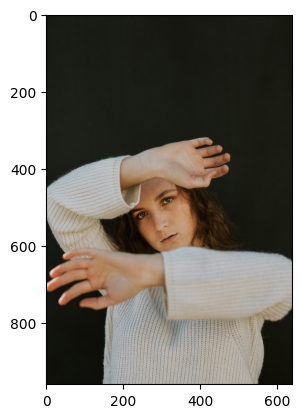

In [74]:
img = cv2.imread(IMAGE_DIR)
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)


In [75]:
# window_name = "image"
# cv2.imshow(window_name, img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [76]:
# STEP 1 : Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 2 : Load the input image
image = mp.Image.create_from_file(IMAGE_DIR)


# STEP 3 : Detect hand landmarks from the input image
detection_result = detector.detect(image)

print(image)
print(detection_result)

HandLandmarkerResult(handedness=[[Category(index=1, score=0.9357714653015137, display_name='Left', category_name='Left')], [Category(index=0, score=0.960895299911499, display_name='Right', category_name='Right')]], hand_landmarks=[[NormalizedLandmark(x=0.39291912317276, y=0.7066095471382141, z=-3.293027077688748e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.34312063455581665, y=0.7504479885101318, z=-0.019821790978312492, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.2708950638771057, y=0.7737331986427307, z=-0.027366425842046738, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.20807738602161407, y=0.779670238494873, z=-0.03694787248969078, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.15704940259456635, y=0.7829774022102356, z=-0.04580849036574364, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.2020859718322754, y=0.7279683947563171, z=0.004851780831813812, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.13295286893844604, y=0.7431300878

I0000 00:00:1721033657.371127 2833192 gl_context.cc:357] GL version: 2.1 (2.1 ATI-5.5.17), renderer: AMD Radeon Pro 5300M OpenGL Engine
W0000 00:00:1721033657.387158 2855005 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1721033657.411439 2855007 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


11 251 620 751
298 468 330 443


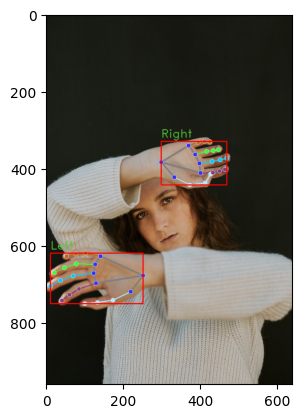

In [80]:
# STEP 4 : Process the classification result. In this case, visualise it
annoted_image = draw_landmarks_on_image(img_RGB, detection_result)["annoted_image"]
# annoted_image_RGB = cv2.cvtColor(annoted_image, cv2.COLOR_BGR2RGB)
plt.imshow(annoted_image)

In [82]:
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

def get_hand_landmarker(image_dir):
    image = mp.Image.create_from_file(image_dir)
    image_RGB = cv2.cvtColor(cv2.imread(image_dir), cv2.COLOR_BGR2RGB)
    
    detection_result = detector.detect(image)
    annoted_image = draw_landmarks_on_image(image_RGB, detection_result)["annoted_image"]
    plt.subplot(1, 2, 1)
    plt.imshow(image_RGB)
    plt.subplot(1, 2, 2)
    plt.imshow(annoted_image)

I0000 00:00:1721033696.019345 2833192 gl_context.cc:357] GL version: 2.1 (2.1 ATI-5.5.17), renderer: AMD Radeon Pro 5300M OpenGL Engine
W0000 00:00:1721033696.033416 2855946 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1721033696.052100 2855946 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


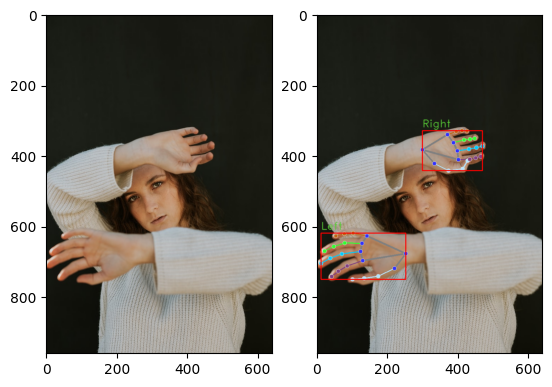

In [85]:
get_hand_landmarker(IMAGE_DIR)